In [21]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01,verbose=True):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    if verbose==True:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
            loss = criterion(outputs, y_train.view(-1, 1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [23]:
#function to test the model

def modeltest(X_test,y_test,model,verbose=True):
    if verbose:
        print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    if verbose:
        print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    

    
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    
    if verbose:        
        print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
        print(f'Mean Absolute Error: {mae}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [24]:
#Function to  create a scatter plot for target and in the same plot  line plot for model predictions
def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
  
    for i in range(len(y)):
     
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
   
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [27]:
model=None
X_train=None
y_train=None
X_test=None
y_test=None


def tester(testing_row=None):
   
    # test over whole testset
    if testing_row is None:
        print("input size is ",X_test.shape," and output size is ",(y_test.shape))
        # pred=0
        pred=modeltest(X_test,y_test,model)
        

    # test for particular row
    else:
        
        # print(X_test[testing_row].shape)
        # print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print("input size is ",x1.shape," and output size is ",(y1.shape))
        
        pred=0
        pred=modeltest(x1,y1,model,verbose=False)
        pred1=pred.item()
        # print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round(abs((y1-pred1)*100/y1),2),"%")
        print("---------------------------------------------------------")
        print()

    return pred
        


Epoch [100/1000], Loss: 4.390904250687518
Epoch [200/1000], Loss: 4.093592884473339
Epoch [300/1000], Loss: 3.984551439645498
Epoch [400/1000], Loss: 3.93999715110102
Epoch [500/1000], Loss: 3.9193113241903403
Epoch [600/1000], Loss: 3.9083007519414394
Epoch [700/1000], Loss: 3.901725509314053
Epoch [800/1000], Loss: 3.897473600351114
Epoch [900/1000], Loss: 3.8945858381747986
Epoch [1000/1000], Loss: 3.8925658480848613
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 23.33%
Mean Absolute Error: 1.5007837323569675
Mean Squared Error: 3.615364533012239
R-squared: 0.9604787012131518
weight: [[3.03625234 2.04697986 0.07858579]]
bias: [-0.31645356]


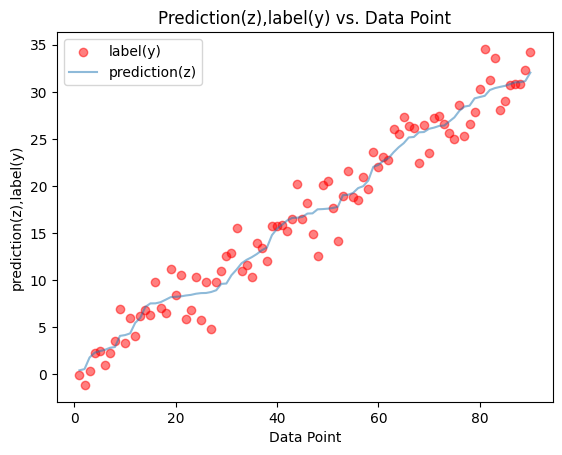

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------


In [28]:


'''Function to train the model with selected feature drop feature corresponds to list of feature to drop and testing=True by default means MSE,MAE,
R-squared will be computed else will only train the model and send it for testing without computing MSE,MAE,R-squared'''

def train_with_selected_features(drop_features=[],testing=True):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    global y_test
    global X_train
    global y_train
    
    #Data  proccessing and normalisation 

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.Also features not required are dropped

    drop_features.append('y')
    X = df.drop(columns=drop_features)
 
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

  
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01,verbose=testing)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    if testing==True:
        pred=tester()
       
        # print(type(y_test))
        # print(type(pred))
        # for i in [X_test,y_test,pred]:
     
        #     print(i.shape)
        create_plot(X_test,y_test,pred)
        
        print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [29]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

'''Extract the covariance between the two variables from the covariance matrix.Numpy arrays are 
 used here and its built in functions utilised to compute covariance'''


covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


Linear(in_features=3, out_features=1, bias=True)
Epoch [100/1000], Loss: 4.167698178537641
Epoch [200/1000], Loss: 4.043364094739934
Epoch [300/1000], Loss: 3.983753320853997
Epoch [400/1000], Loss: 3.9509950989176006
Epoch [500/1000], Loss: 3.931007745158325
Epoch [600/1000], Loss: 3.91795429199436
Epoch [700/1000], Loss: 3.9090833118056545
Epoch [800/1000], Loss: 3.902915701246623
Epoch [900/1000], Loss: 3.898567595636728
Epoch [1000/1000], Loss: 3.895472434812856
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 23.33%
Mean Absolute Error: 1.5036659789969724
Mean Squared Error: 3.6200345824602222
R-squared: 0.9604276506433136
weight: [[3.03334786 2.03656516 0.06241175]]
bias: [-0.26006815]


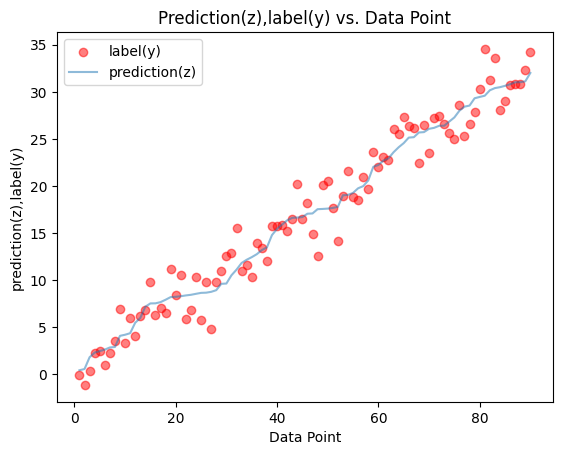

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------
Epoch [100/1000], Loss: 91.74211679155474
Epoch [200/1000], Loss: 85.48779674194608
Epoch [300/1000], Loss: 82.51104896423394
Epoch [400/1000], Loss: 80.89716791628484
Epoch [500/1000], Loss: 79.93880899035993
Epoch [600/1000], Loss: 79.33768534399272
Epoch [700/1000], Loss: 78.9486011376181
Epoch [800/1000], Loss: 78.6918980741194
Epoch [900/1000], Loss: 78.52023076340505
Epoch [1000/1000], Loss: 78.4041174434068
Training Done
input size is  torch.Size([90, 2])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 3.33%
Mean Absolute Error: 8.407031221183452
Mean Squared Error: 92.76760128477179
R-squared: -0.014087529663292297
weight: [[4.17524655 0.7974088 ]]
bias: [12.08424628]


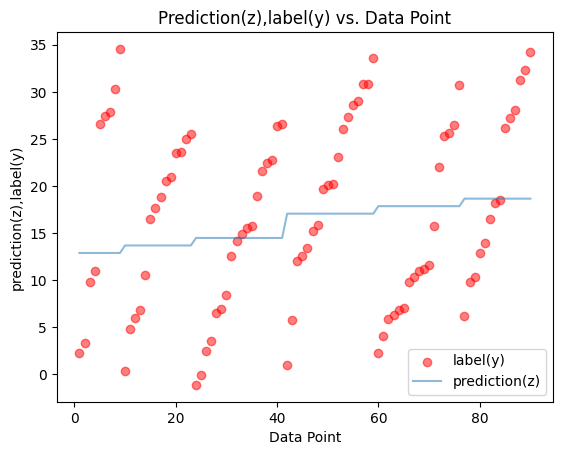

Linear(in_features=2, out_features=1, bias=True)
------------------------------------------------
Epoch [100/1000], Loss: 5.034687593262135
Epoch [200/1000], Loss: 5.033865312875402
Epoch [300/1000], Loss: 5.033548025852762
Epoch [400/1000], Loss: 5.03342332030062
Epoch [500/1000], Loss: 5.033372959315183
Epoch [600/1000], Loss: 5.033351838991967
Epoch [700/1000], Loss: 5.033342539099043
Epoch [800/1000], Loss: 5.033338203174125
Epoch [900/1000], Loss: 5.033336056693869
Epoch [1000/1000], Loss: 5.033334932907381
Training Done
input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7370303960562161
Mean Squared Error: 4.649170185572351
R-squared: 0.9491776714803853
weight: [[3.08170546]]
bias: [0.62407157]


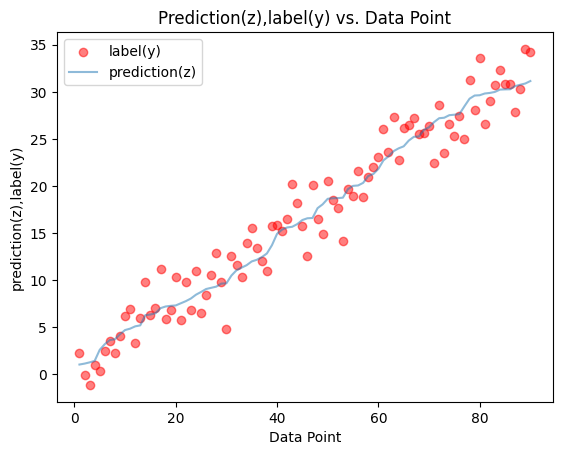

Linear(in_features=1, out_features=1, bias=True)
------------------------------------------------


In [31]:



print(model)
train_with_selected_features()

### You can comment/uncomment these two to run the code for model predictions by removing one and two features respectively.

# Function  to remove any one features and train the model
train_with_selected_features('X1')

# Function  to remove any one features and train the model
train_with_selected_features(['X2','X3'])


In [32]:
# doesnt alter model, only tests:
# testing over all values:
tester()



input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7370303960562161
Mean Squared Error: 4.649170185572351
R-squared: 0.9491776714803853
weight: [[3.08170546]]
bias: [0.62407157]


tensor([[31.1434],
        [ 7.3082],
        [21.0582],
        [ 8.7389],
        [ 1.2605],
        [23.9951],
        [10.4861],
        [12.4413],
        [18.7543],
        [26.2345],
        [20.0074],
        [27.5166],
        [ 9.0538],
        [25.2175],
        [ 6.3448],
        [29.9863],
        [21.8104],
        [ 7.2654],
        [29.8192],
        [23.1469],
        [ 8.4498],
        [ 7.1977],
        [16.5935],
        [ 1.4149],
        [ 7.0177],
        [13.7116],
        [12.1549],
        [14.9101],
        [ 9.1798],
        [18.7070],
        [27.2456],
        [ 4.2461],
        [16.5682],
        [ 4.6940],
        [22.7156],
        [12.8295],
        [18.0487],
        [ 6.2722],
        [ 5.0879],
        [15.6645],
        [11.5830],
        [29.6054],
        [24.2091],
        [23.6957],
        [28.4741],
        [ 3.1949],
        [17.6410],
        [18.6359],
        [30.2681],
        [ 9.6272],
        [ 8.0457],
        [ 3.7148],
        [ 1.

In [39]:
# You can change the argument to test for other rows as testing row as well.Here we did for a random index.

import random
idx=random.randint(0,89)

print("chosen index is ",idx,"\n")
# testing for particular value with all features:
train_with_selected_features(testing=False)
tester(idx)

# testing for particular value with only X1 feature:
train_with_selected_features(['X2','X3'],testing=False)
tester(idx)

chosen index is  81 

Training Done
------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
weight: [[ 0.34295863 -0.34154207  0.5518316 ]]
bias: [-0.11589706]
input features are :  [[1.3690027168559893, 0.0, 3.0]]
prediction is  2.01
actual value is  6.89
relative error is  70.83 %
---------------------------------------------------------

Training Done
------------------------------------------------
input size is  torch.Size([1, 1])  and output size is  torch.Size([1])
weight: [[0.20786285]]
bias: [-0.31649709]
input features are :  [[1.3690027168559893]]
prediction is  -0.03
actual value is  6.89
relative error is  100.46 %
---------------------------------------------------------



c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


tensor([[-0.0319]], dtype=torch.float64)